# Final Project #

## Create the DataFrame ##

In [1]:
import pandas as pd
import numpy as mp
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/student-por.csv"
students_df = pd.read_csv(csv_path)
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
students_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
# students_df["overall_alc"] = (students_df["Dalc"]*5+students_df["Walc"]*2)/7
# students_df["overall_alc"] = students_df["overall_alc"].apply(lambda x: round(x,0))
   
# # df['column'] = df['column'].apply(lambda x: round(x, decimals))

# students_df.head()

In [6]:
# need to pull out Walc before get dummies on dataset - need Walc later to bin
pulled_Dalc = students_df[['Dalc']].copy()
pulled_Dalc

,Dalc
0,1
1,1
2,2
3,1
4,1
...,...
644,1
645,1
646,1
647,3


In [7]:
# Drop unrelated columns and Walc
students_df = students_df.drop(['school','G1', 'G2', 'G3', 'Dalc', 'Walc'], axis=1)
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,yes,yes,no,no,4,3,4,3,4
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,no,yes,yes,no,5,3,3,3,2
2,F,15,U,LE3,T,1,1,at_home,other,other,...,no,yes,yes,yes,no,4,3,2,3,6
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,yes,3,2,2,5,0
4,F,16,U,GT3,T,3,3,other,other,home,...,no,yes,yes,no,no,4,3,2,5,0


In [8]:
students_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,yes,yes,no,no,4,3,4,3,4
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,no,yes,yes,no,5,3,3,3,2
2,F,15,U,LE3,T,1,1,at_home,other,other,...,no,yes,yes,yes,no,4,3,2,3,6
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,yes,3,2,2,5,0
4,F,16,U,GT3,T,3,3,other,other,home,...,no,yes,yes,no,no,4,3,2,5,0


In [9]:
# perform get dummies on data set (less Walc) to binary encode for scaling
encoded_students_df = pd.get_dummies(students_df)
encoded_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [10]:
# keep encoded df clean from y data for prediction purposes
working_students_df = encoded_students_df.copy()
working_students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,3,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,...,1,0,0,1,0,1,1,0,1,0


In [11]:
# insert Walc back into encoded dataframe
working_students_df['Dalc']=pulled_Dalc['Dalc']
working_students_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Dalc
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,1
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,1
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,2
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,1
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,5,...,1,1,0,0,1,0,1,1,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,0,1,1,0,1
646,18,1,1,2,2,0,1,1,1,5,...,1,0,1,0,1,1,0,1,0,1
647,17,3,1,2,1,0,2,4,5,2,...,0,1,0,0,1,0,1,1,0,3


In [12]:
Dalc_col = working_students_df[['Dalc']]
new_df = working_students_df.drop(['Dalc'], axis=1)
new_df['Dalc'] = Dalc_col
new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Dalc
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,1
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,1
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,2
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,1
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,1


In [13]:
# Create the bins in which Drinking levels will be held
bins = [0,1,2,3,4,5]

# Create the names for the five bins
group_names = ["A.Not at all", "B.Slightly", "C.Moderately", "D.Very", "E.Extremely"]

In [14]:
# Create column to contain new bins
working_students_df["Likelyhood to Drink"] = pd.cut(working_students_df["Dalc"], bins, labels=group_names)
working_students_df = working_students_df.drop(['Dalc'], axis=1)

working_students_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Likelyhood to Drink
0,18,4,4,2,2,0,4,3,4,3,...,0,0,1,0,1,1,0,1,0,A.Not at all
1,17,1,1,1,2,0,5,3,3,3,...,0,1,0,0,1,0,1,1,0,A.Not at all
2,15,1,1,1,2,0,4,3,2,3,...,0,0,1,0,1,0,1,1,0,B.Slightly
3,15,4,2,1,3,0,3,2,2,5,...,1,0,1,0,1,0,1,0,1,A.Not at all
4,16,3,3,1,2,0,4,3,2,5,...,0,0,1,0,1,1,0,1,0,A.Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,5,...,1,1,0,0,1,0,1,1,0,A.Not at all
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,0,1,1,0,A.Not at all
646,18,1,1,2,2,0,1,1,1,5,...,1,0,1,0,1,1,0,1,0,A.Not at all
647,17,3,1,2,1,0,2,4,5,2,...,0,1,0,0,1,0,1,1,0,C.Moderately


In [15]:
# Reformat data (x-inputs, y labels)
data = working_students_df.values
X = data[:, 0:52]
y = data[:, 52]

# y = y.reshape(-1, 1)
print(X)
print(y)

[[18 4 4 ... 0 1 0]
 [17 1 1 ... 1 1 0]
 [15 1 1 ... 1 1 0]
 ...
 [18 1 1 ... 0 1 0]
 [17 3 1 ... 1 1 0]
 [18 3 2 ... 1 1 0]]
['A.Not at all' 'A.Not at all' 'B.Slightly' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'B.Slightly' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'B.Slightly' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'B.Slightly' 'A.Not at all' 'E.Extremely' 'C.Moderately' 'A.Not at all'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 'A.Not at all' 'B.Slightly' 'A.Not at all' 'A.Not at all' 'B.Slightly'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'B.Slightly' 'A.Not at all'
 'B.Slightly' 'A.Not at all' 'C.Moderately' 'B.Slightly' 'D.Very'
 'A.Not at all' 'A.Not at all' 'A.Not at all' 'A.Not at all'
 

In [16]:
print(X.shape)
print(y.shape)

(649, 52)
(649,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

## Data Preprocessing ##

k: 1, Train/Test Score: 1.000/0.558
k: 3, Train/Test Score: 0.761/0.632
k: 5, Train/Test Score: 0.737/0.638
k: 7, Train/Test Score: 0.720/0.632
k: 9, Train/Test Score: 0.718/0.632
k: 11, Train/Test Score: 0.716/0.638
k: 13, Train/Test Score: 0.720/0.638
k: 15, Train/Test Score: 0.716/0.638
k: 17, Train/Test Score: 0.712/0.644
k: 19, Train/Test Score: 0.712/0.644
k: 21, Train/Test Score: 0.712/0.644
k: 23, Train/Test Score: 0.712/0.644
k: 25, Train/Test Score: 0.712/0.644
k: 27, Train/Test Score: 0.712/0.644
k: 29, Train/Test Score: 0.712/0.644
k: 31, Train/Test Score: 0.712/0.644
k: 33, Train/Test Score: 0.712/0.644
k: 35, Train/Test Score: 0.712/0.644
k: 37, Train/Test Score: 0.712/0.644
k: 39, Train/Test Score: 0.712/0.644


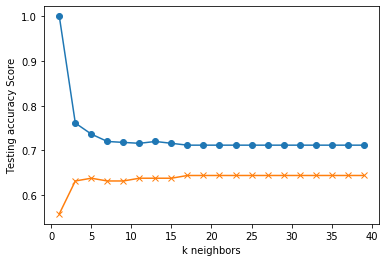

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.638


In [20]:
data = {'KNN_Score Dalc Likelyhood': [knn.score(X_test, y_test)]}
knn_score_df = pd.DataFrame(data=data)
knn_score_df

,KNN_Score Dalc Likelyhood
0,0.638037


In [21]:
knn_score_df.to_csv('Resources/knn_score_Dalc_likelyhood.csv')